# Solution to exercise



In [1]:
%matplotlib inline

import tensorflow as tf

import numpy 
import matplotlib.pyplot as plt
import time

## The MNIST dataset

We will now download the dataset that contains handwritten digits. 

Note that downloading it the first time might take some time.
The data is split as follows:
- The training data x_train of size $(60000, 28, 28)$  and the corresponding classes ($"0", "1", ... "9"$) in y_train which is a $60000$ dimensional vector,
- The test data x_test of size $(10000, 28*28)$  and the corresponding classes in y_test which is a $10000$ dimensional vector

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:

x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('MNIST data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)
print('X_test:', x_test.shape)
print('Y_test:', y_test.shape)


MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# x_train = x_train.reshape(x_train.shape[0], numpy.prod(x_train[0,:,:].shape))
# x_test = x_test.reshape(x_test.shape[0], numpy.prod(x_test[0,:,:].shape))

print(x_train.shape)
print(x_test.shape)

y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('MNIST data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)

(60000, 28, 28)
(10000, 28, 28)

MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 28, 28)
y_train: (60000,)


Let's take a closer look. Here are the first 10 training digits:

Let's define a helper function to show the failure cases of our classifier.

In [6]:
def show_failures(predictions, trueclass=None, predictedclass=None, maxtoshow=10):
    rounded = numpy.argmax(predictions, axis=1)
    errors = rounded!=y_test
    print('Showing max', maxtoshow, 'first failures. '
          'The predicted class is shown first and the correct class in parenthesis.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(x_test.shape[0]):
        if ii>=maxtoshow:
            break
        if errors[i]:
            if trueclass is not None and y_test[i] != trueclass:
                continue
            if predictedclass is not None and rounded[i] != predictedclass:
                continue
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            plt.imshow(x_test[i,:,:], cmap="gray")
            plt.title("%d (%d)" % (rounded[i], y_test[i]))
            ii = ii + 1

We can now implement a deep network in Keras. Dropout() performs the dropout operation mentioned earlier

In [7]:
class NonlinearClassifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.layer_1 = tf.keras.layers.Dense(50, activation='relu')
        
        self.layer_2 = tf.keras.layers.Dense(50, activation='relu')
        self.drop_3 = tf.keras.layers.Dropout(0.2)
        self.layer_4 = tf.keras.layers.Dense(50, activation='relu')
        self.drop_5 = tf.keras.layers.Dropout(0.2)
        
        # The last layer needs to be like this:
        self.layer_out = tf.keras.layers.Dense(10, activation='softmax')


    def call(self, inputs):

        x = tf.keras.layers.Flatten()(inputs)
        x = self.layer_1(x)
        
        # The more complex version:
        x = self.layer_2(x)
        x = self.drop_3(x)
        x = self.layer_4(x)
        x = self.drop_5(x)
        
        x = self.layer_out(x)

        return x

In [8]:
nonlinear_model = NonlinearClassifier()

nonlinear_model.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=['accuracy'])

2023-08-09 13:12:27.359603: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-09 13:12:27.359815: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Learning

In [9]:
%%time
# This took about a third of a second per epoch on my laptop
epochs = 30
batch_size = 512 

history = nonlinear_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/30


2023-08-09 13:12:27.479042: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


118/118 - 1s - loss: 0.8687 - accuracy: 0.7297
Epoch 2/30
118/118 - 0s - loss: 0.3892 - accuracy: 0.8875
Epoch 3/30
118/118 - 0s - loss: 0.2927 - accuracy: 0.9157
Epoch 4/30
118/118 - 0s - loss: 0.2371 - accuracy: 0.9334
Epoch 5/30
118/118 - 0s - loss: 0.2009 - accuracy: 0.9436
Epoch 6/30
118/118 - 0s - loss: 0.1784 - accuracy: 0.9485
Epoch 7/30
118/118 - 0s - loss: 0.1600 - accuracy: 0.9538
Epoch 8/30
118/118 - 0s - loss: 0.1425 - accuracy: 0.9591
Epoch 9/30
118/118 - 0s - loss: 0.1310 - accuracy: 0.9626
Epoch 10/30
118/118 - 0s - loss: 0.1223 - accuracy: 0.9650
Epoch 11/30
118/118 - 0s - loss: 0.1123 - accuracy: 0.9675
Epoch 12/30
118/118 - 0s - loss: 0.1059 - accuracy: 0.9690
Epoch 13/30
118/118 - 0s - loss: 0.0994 - accuracy: 0.9711
Epoch 14/30
118/118 - 0s - loss: 0.0936 - accuracy: 0.9725
Epoch 15/30
118/118 - 0s - loss: 0.0881 - accuracy: 0.9737
Epoch 16/30
118/118 - 0s - loss: 0.0841 - accuracy: 0.9756
Epoch 17/30
118/118 - 0s - loss: 0.0794 - accuracy: 0.9767
Epoch 18/30
118/1

In [10]:
print(nonlinear_model.summary())

Model: "nonlinear_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  39250     
_________________________________________________________________
dense_1 (Dense)              multiple                  2550      
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  2550      
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  510       
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
__________________________________________

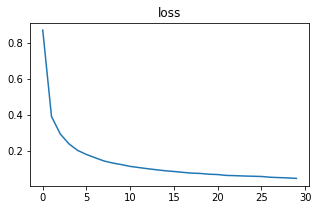

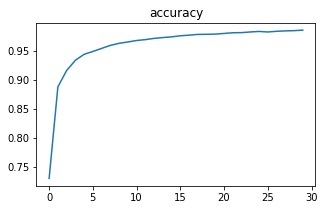

In [11]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

In [12]:
nonlinscores = nonlinear_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (nonlinear_model.metrics_names[1], nonlinscores[1]*100))

313/313 - 0s - loss: 0.1178 - accuracy: 0.9709
accuracy: 97.09%


Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.


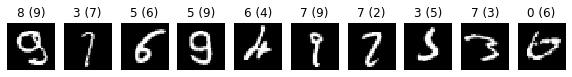

In [13]:
nonlinpredictions = nonlinear_model.predict(x_test)

show_failures(nonlinpredictions)